<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/Leegunju_assign_7_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Plot the training data [1pt]


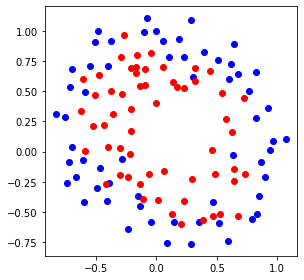

In [50]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
# Training 
def Training(X, y, lr, iteration, lamda):
  th = np.zeros(X.shape[1])    
  b_history = []
  a_history = []
  for i in range(iteration):
    z = np.dot(X, th)
    h = sigmoid(z)
    acc = accuracy(X, y, th)
    cost = loss_function(h, y, lamda, th)
    b_history.append(cost)
    a_history.append(acc)
    gradient = np.dot(X.T, (h - y)) / y.size
    th -= lr * (gradient + lamda * th / y.size)
  return th, b_history, a_history



def fea_map(x1, x2, degree):
  temp = np.ones(len(x1)).reshape(len(x1), 1)
  for i in range(1, degree + 1):
    for j in range(i + 1):
      terms = (x1**(i-j) * x2**j).reshape(len(x1), 1)
      temp = np.hstack((temp, terms))
  return temp

def sigmoid(z):
  Z = 1 / (1+np.exp(-z))
  return Z 

# Objective Function (loss-function)
def loss_function(h, y, lamda, th):
  a = len(y) 
  b = 0
  b_reg = (lamda / (2*a)) * np.sum(np.square(th))
  b = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + b_reg;
  return b



def predict_list(X, th):
  return sigmoid(np.dot(X, th))

def predict(X, th):
  return predict_list(X, th) >= 0.5

def accuracy(X, y, th):
  predic = predict(X, th)
  return (predic == y).mean() * 100


#초기값
lr = 2
th = []
iteration = 5000

X_fea = fea_map(pointX, pointY, 9)
overfit_th, overfitting_cost, overfit_accuracy = Training(X_fea, label, lr, iteration, 0.005)
right_th, right_cost, right_accuracy = Training(X_fea, label, lr, iteration, 0.05)
underfit_th, underfit_cost, underfit_accuracy = Training(X_fea, label, lr, iteration, 10)

# 2. Plot the training error with varying regularization parameters



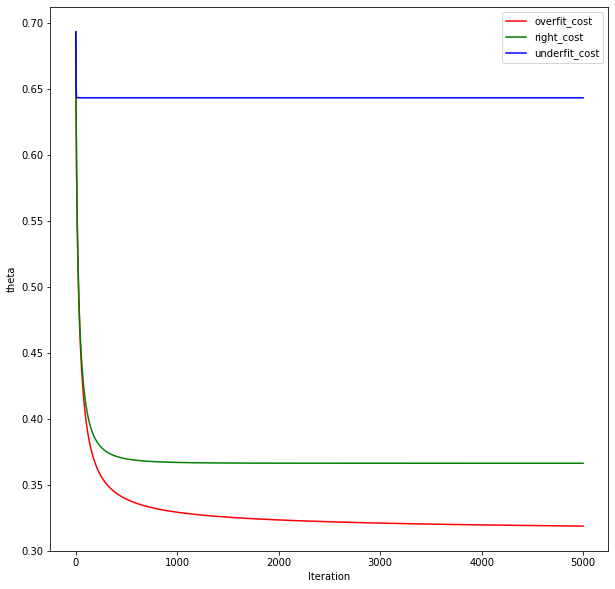

In [63]:

plt.figure(figsize=(10, 10))
plt.plot(overfitting_cost, label = "overfit_cost", color = 'r')
plt.plot(right_cost, label = "right_cost", color = 'g')
plt.plot(underfit_cost, label = "underfit_cost", color = 'b')
plt.xlabel("Iteration")
plt.ylabel("theta")
plt.legend()
plt.show()

# 3. Display the values of the chosen regularization parameters

In [64]:
print("Th of Over-fit: ", overfit_th)
print("Th of rigthfit: ", right_th)
print("Th of Underfit: ", underfit_th)

Th of Over-fit:  [ 3.85337669  1.85916454  5.10410222 -5.87766796 -6.90405075 -5.62790681
  2.63100932 -0.60312645  2.4666397  -2.49439117 -3.26304943  2.6500194
 -3.81549568 -1.6050586  -6.07529024 -0.13605409 -0.64311155  3.91428616
 -3.29643344 -2.45287294  0.29234612 -3.76462465  0.83894927 -1.04196016
  2.47395714 -3.82624737 -2.08712018 -2.28566638 -1.53576822 -0.13760317
  1.1492893  -1.19292751  1.59038862 -2.25551128 -3.38602591  1.82323284
 -3.86909936  0.58559657 -0.43853383  0.69241823 -1.32371341  1.60288796
 -2.52619637 -2.45268687 -0.17442879 -2.09309947  0.11367328  0.21550846
 -0.3034905   0.38450979 -0.91259111  0.95654796 -1.3842792  -3.34498995
  1.91001215]
Th of rigthfit:  [ 3.05168032  1.92101578  3.58308557 -4.4995517  -4.29036506 -4.67714594
  1.38438676 -1.11021824  0.04490799 -0.98501471 -3.21283733  0.88627897
 -2.29445745 -1.21204347 -3.59279677 -0.24862429 -0.52741209  1.17276667
 -1.6053232  -1.31015098 -0.23092194 -2.66860215  0.539009   -0.86386232
  0.

# 4. Plot the training accuracy with varying regularization parameters



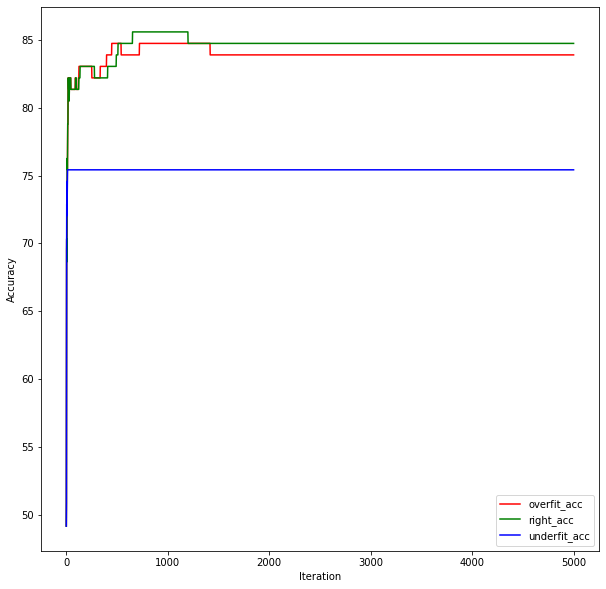

In [65]:

plt.figure(figsize=(10, 10))
plt.plot(overfit_accuracy, label = "overfit_acc", color = 'r')
plt.plot(right_accuracy, label = "right_acc", color = 'g')
plt.plot(underfit_accuracy, label = "underfit_acc", color = 'b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5. Display the final training accuracy with varying regularization parameters

In [66]:
print("Training accuracy of overfit:", accuracy(X_fea, label, overfit_th), "%")
print("Training accuracy of right:", accuracy(X_fea, label, right_th), "%")
print("Training accuracy of underfit:", accuracy(X_fea, label, underfit_th), "%")

Training accuracy of overfit: 83.89830508474576 %
Training accuracy of right: 84.7457627118644 %
Training accuracy of underfit: 75.42372881355932 %


# 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

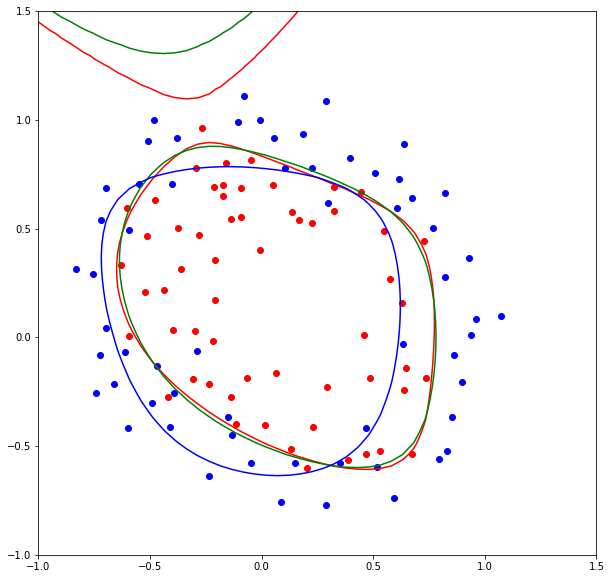

In [67]:
def fea_map_plot(x1, x2, degree):
  temp = np.ones(1)
  for i in range(1,degree+1):
    for j in range(i+1):
      terms = (x1**(i-j) * x2**j)
      temp = np.hstack((temp, terms))
  return temp

N = np.linspace(-1, 1.5, 50)
M = np.linspace(-1, 1.5, 50)

H1=np.zeros((len(N),len(M)))
H2=np.zeros((len(N),len(M)))
H3=np.zeros((len(N),len(M)))
for i in range(len(N)):
  for j in range(len(M)):
    H1[i,j] = fea_map_plot(N[i],M[j], 9) @ overfit_th
    H2[i,j] = fea_map_plot(N[i],M[j], 9) @ right_th
    H3[i,j] = fea_map_plot(N[i],M[j], 9) @ underfit_th

plt.figure(figsize=(10, 10))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.contour(N,M,H1.T,0,colors='r')
plt.contour(N,M,H2.T,0,colors='g')
plt.contour(N,M,H3.T,0,colors='b')
plt.show()